In [1]:
import warnings
import itertools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
%matplotlib inline

plt.style.use("fivethirtyeight")
pd.set_option('display.max_columns', 100)

/Users/adamszabunio/anaconda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
full_data = pd.read_csv("ts_corn_47yr_df.csv")

full_data.fips_code = full_data.fips_code.astype(str).apply(lambda x: x.zfill(5))
full_data.set_index('fips_code', inplace=True)
full_data.columns = full_data.columns.astype(int)
full_data.head()

,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
fips_code,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
01049,35.0,56.0,61.2,61.7,56.0,63.0,75.0,29.0,42.1,80.3,17.6,38.7,63.9,54.7,88.4,96.2,49.3,79.8,41.8,90.0,60.6,85.6,123.7,53.8,109.9,65.0,92.0,86.0,74.0,101.0,80.0,117.0,84.0,100.0,136.0,129.0,58.0,80.0,71.0,117.0,87.0,129.7,103.5,140.5,144.3,151.0,96.8
01077,25.0,42.0,51.4,55.5,40.0,50.0,50.0,36.0,66.4,51.6,40.3,76.7,79.4,52.0,70.0,84.9,70.0,77.9,34.5,79.3,35.9,54.5,104.0,54.7,96.2,95.0,80.0,76.0,61.0,100.0,95.0,128.0,99.0,145.0,135.0,112.0,84.0,92.0,99.0,130.0,126.5,124.8,75.7,154.6,184.4,161.6,106.5
01079,30.0,45.0,52.5,54.4,34.0,42.0,53.0,33.0,30.3,42.6,20.0,69.7,69.6,41.1,67.9,74.5,75.0,65.7,31.1,83.3,44.3,78.6,109.2,65.6,110.9,92.0,82.0,108.0,68.0,136.0,99.0,138.0,115.0,153.0,151.0,136.0,77.0,73.0,98.0,112.0,143.0,132.5,78.6,172.0,187.1,140.3,117.2
01083,33.0,44.0,47.3,49.0,40.0,44.0,68.0,38.0,71.7,71.9,47.3,67.5,75.8,61.0,71.7,101.6,69.3,58.2,30.3,82.2,41.2,70.2,119.1,66.7,93.9,94.0,90.0,86.0,71.0,112.0,86.0,146.0,107.0,150.0,150.0,139.0,85.0,100.0,122.0,142.0,144.5,128.3,71.9,159.3,181.7,170.8,112.9
01089,33.0,51.0,56.7,61.1,54.0,75.0,79.0,35.0,61.3,74.9,25.2,55.4,96.0,55.9,78.5,98.1,63.3,71.2,45.9,80.0,49.3,82.0,98.9,50.0,116.7,104.0,93.0,83.0,68.0,121.0,88.0,118.0,102.0,125.0,137.0,143.0,90.0,100.0,153.0,128.0,113.9,147.9,110.6,161.6,169.0,173.2,150.7


# Linear Regression

Fips Code: 01049


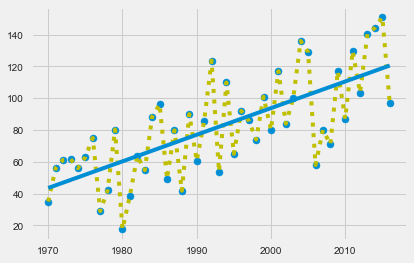

Fips Code: 19087


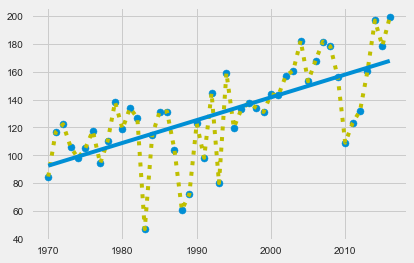

Fips Code: 27147


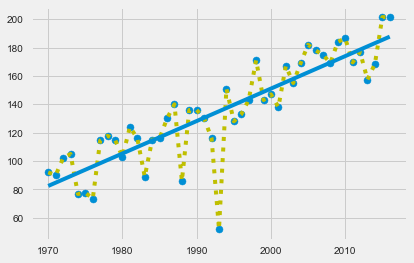

Fips Code: 39099


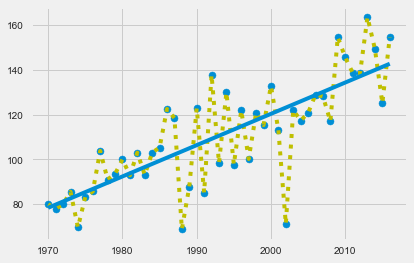

Fips Code: 55109


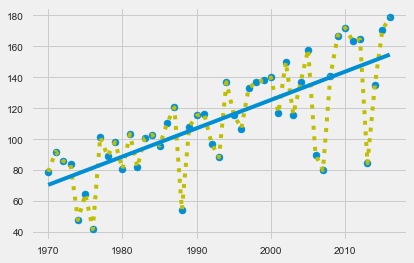

In [3]:
for i in range(0, full_data.shape[0], 200): # Choose 5 Counties from dataset to fit a linear regression  
    print("Fips Code: {}".format(full_data.iloc[i].name))
    X = np.array(full_data.columns).reshape(-1,1)
    y = full_data.iloc[i].values
    lm = LinearRegression()
    lm.fit(X, y)
    preds = lm.predict(X)
    plt.scatter(X, y) # true values
    plt.plot(X, y, 'y:') 
    plt.plot(X, preds) # plot line of best fit
    plt.show();

# Randomly create an array of years to remove from complete dataset

In [4]:
pop_list = np.random.randint(1970,2017, full_data.shape[0])
pop_list[:5]

array([1993, 1980, 1990, 2012, 1977])

/Users/adamszabunio/anaconda/lib/python3.6/site-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


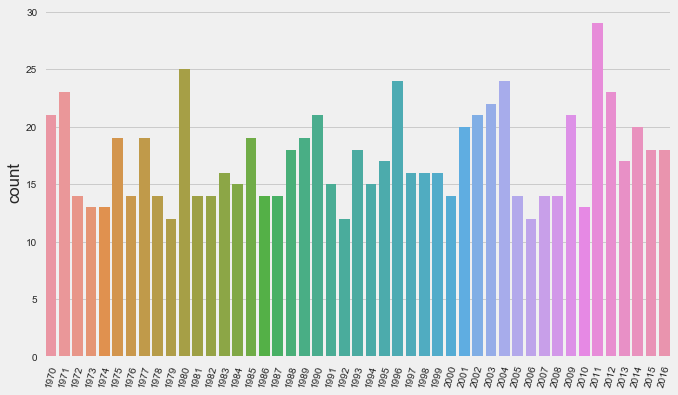

In [5]:
fig, ax = plt.subplots(figsize=(10,6))
plt.xticks(rotation=75)
sns.countplot(pop_list); # distribution of randomn draws (count by year) TODO: add x/y labels, titles, and legends to all plots

# Keep track of all the removed data 

In [6]:
true = [full_data.iloc[i][yr] for i, yr in enumerate(pop_list)]
true[:5]

[53.799999999999997,
 40.299999999999997,
 44.299999999999997,
 71.900000000000006,
 35.0]

In [7]:
full_test = full_data.copy() # make a copy before removing data
for i, yr in enumerate(pop_list):
    full_test.iloc[i][yr] = np.nan 

In [8]:
full_test.head()

,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
fips_code,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
01049,35.0,56.0,61.2,61.7,56.0,63.0,75.0,29.0,42.1,80.3,17.6,38.7,63.9,54.7,88.4,96.2,49.3,79.8,41.8,90.0,60.6,85.6,123.7,NaN,109.9,65.0,92.0,86.0,74.0,101.0,80.0,117.0,84.0,100.0,136.0,129.0,58.0,80.0,71.0,117.0,87.0,129.7,103.5,140.5,144.3,151.0,96.8
01077,25.0,42.0,51.4,55.5,40.0,50.0,50.0,36.0,66.4,51.6,NaN,76.7,79.4,52.0,70.0,84.9,70.0,77.9,34.5,79.3,35.9,54.5,104.0,54.7,96.2,95.0,80.0,76.0,61.0,100.0,95.0,128.0,99.0,145.0,135.0,112.0,84.0,92.0,99.0,130.0,126.5,124.8,75.7,154.6,184.4,161.6,106.5
01079,30.0,45.0,52.5,54.4,34.0,42.0,53.0,33.0,30.3,42.6,20.0,69.7,69.6,41.1,67.9,74.5,75.0,65.7,31.1,83.3,NaN,78.6,109.2,65.6,110.9,92.0,82.0,108.0,68.0,136.0,99.0,138.0,115.0,153.0,151.0,136.0,77.0,73.0,98.0,112.0,143.0,132.5,78.6,172.0,187.1,140.3,117.2
01083,33.0,44.0,47.3,49.0,40.0,44.0,68.0,38.0,71.7,71.9,47.3,67.5,75.8,61.0,71.7,101.6,69.3,58.2,30.3,82.2,41.2,70.2,119.1,66.7,93.9,94.0,90.0,86.0,71.0,112.0,86.0,146.0,107.0,150.0,150.0,139.0,85.0,100.0,122.0,142.0,144.5,128.3,NaN,159.3,181.7,170.8,112.9
01089,33.0,51.0,56.7,61.1,54.0,75.0,79.0,NaN,61.3,74.9,25.2,55.4,96.0,55.9,78.5,98.1,63.3,71.2,45.9,80.0,49.3,82.0,98.9,50.0,116.7,104.0,93.0,83.0,68.0,121.0,88.0,118.0,102.0,125.0,137.0,143.0,90.0,100.0,153.0,128.0,113.9,147.9,110.6,161.6,169.0,173.2,150.7


### Save test set with missing values to try additional imputation techniques

In [9]:
# full_test.to_csv("corn_test_df.csv") 

# Plot Linear Regression on data with one random missing value for each year 


 For Random Year: 1993 and Fips Code: 01049
 True: 53.80
 Predicted: 82.66
 Residual: 28.86


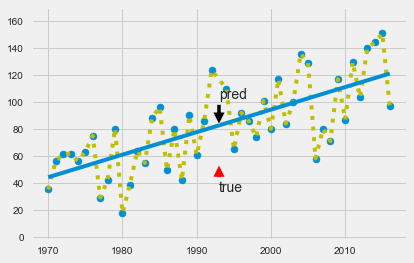


 For Random Year: 2004 and Fips Code: 18009
 True: 155.00
 Predicted: 140.64
 Residual: -14.36


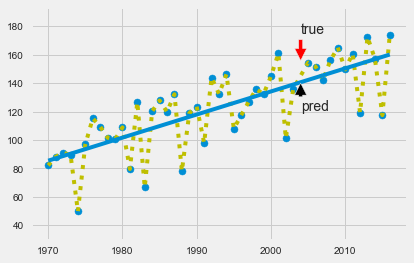


 For Random Year: 2013 and Fips Code: 19087
 True: 160.40
 Predicted: 162.96
 Residual: 2.56


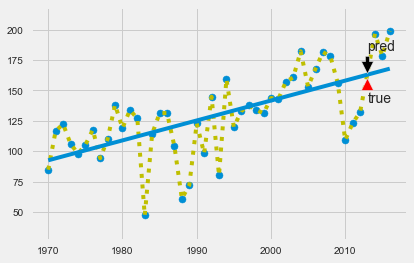


 For Random Year: 1996 and Fips Code: 21231
 True: 135.00
 Predicted: 123.63
 Residual: -11.37


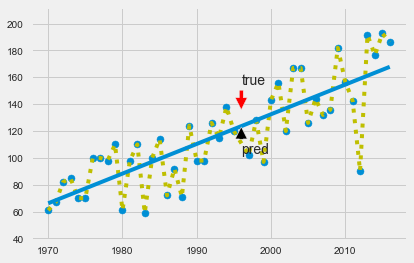


 For Random Year: 1992 and Fips Code: 27147
 True: 116.00
 Predicted: 133.14
 Residual: 17.14


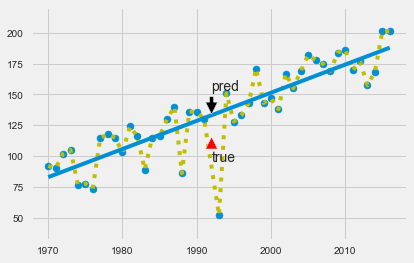


 For Random Year: 2015 and Fips Code: 31137
 True: 224.00
 Predicted: 209.24
 Residual: -14.76


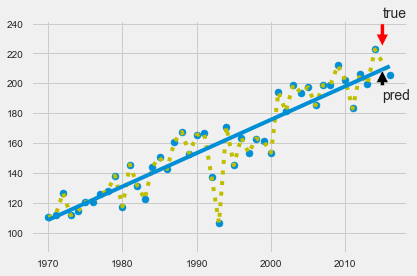


 For Random Year: 1993 and Fips Code: 39099
 True: 98.30
 Predicted: 110.80
 Residual: 12.50


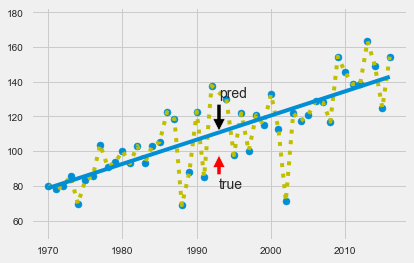


 For Random Year: 2007 and Fips Code: 47047
 True: 113.00
 Predicted: 126.28
 Residual: 13.28


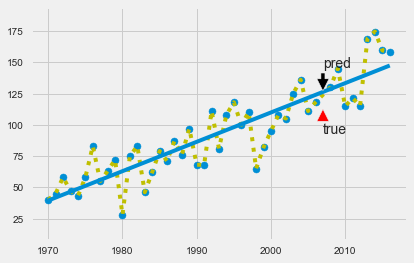


 For Random Year: 1983 and Fips Code: 55109
 True: 100.90
 Predicted: 94.16
 Residual: -6.74


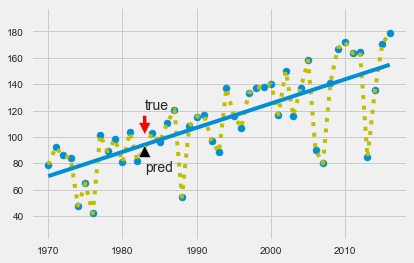

In [10]:
for i in range(0, full_data.shape[0], 100):
    X = full_data.columns.tolist() # years (1970 - 2016)
    X.remove(pop_list[i]) # remove the randomly chosen year
    X_miss = np.array(X).reshape(-1,1) # Final X to use for predictions
    y = full_test.iloc[i].dropna().values 
    lm = LinearRegression()
    lm.fit(X_miss, y)
    
    X_full = np.array(full_data.columns).reshape(-1,1) # X to predict on for all years
    preds = lm.predict(X_full)
    pred_val = preds[pop_list[i]-1970] # idx for the predicition of missing val
    pred_yr = pop_list[i] # year of missing point
    
    print("\n For Random Year: {} and Fips Code: {}\n True: {:.2f}\n Predicted: {:.2f}\n Residual: {:.2f}"\
          .format(pred_yr, full_test.iloc[i].name, true[i], pred_val, pred_val-true[i]))
    
    if pred_val > true[i]: # set bounds for plotting points
        dist = 20
    else:
        dist = -20
    plt.ylim(min(true[i], min(y))-20, max(y)+20) # set bounds for y-axis to capture extreme true values
    plt.annotate('pred', xy=(pred_yr, pred_val), xytext=(pred_yr, pred_val+dist),
                arrowprops=dict(facecolor='black', shrink=0.05))
    plt.annotate('true', xy=(pred_yr, true[i]), xytext=(pred_yr, true[i]-dist),
                arrowprops=dict(facecolor='red', shrink=0.05))
    plt.scatter(X_miss, y) # "complete" data (w/o removed value)
    plt.plot(X_miss, y, 'y:') 
    plt.plot(X_full, preds) # line of best fit
    plt.show();
plt.close('all')

# Predictions for all missing values

In [11]:
y_pred = []
for i in range(full_data.shape[0]):
    X = full_data.columns.tolist()
    X.remove(pop_list[i])
    X_miss = np.array(X).reshape(-1,1)
    y = full_test.iloc[i].dropna().values
    lm = LinearRegression()
    lm.fit(X_miss, y)
    
    X_full = np.array(full_data.columns).reshape(-1,1)
    preds = lm.predict(X_full)
    y_pred.append(preds[pop_list[i]-1970])

In [12]:
len(true), len(y_pred)

(814, 814)

In [13]:
# fill in missing values (1) with the value of the previous year for that specific county
ffill_df = full_test.copy()
ffill_df.fillna(method='ffill', axis=1, inplace=True)
# unless it is the first year in the series, then fill in value from the second year
ffill_df.fillna(method='bfill', axis=1, inplace=True)

ffill_preds = [ffill_df.iloc[i][pop_list[i]] for i in range(full_test.shape[0])]

# fill in missing values (1) with the mean of all years for that specific county
yr_mean_df = full_test.copy()
yr_mean_df = yr_mean_df.apply(lambda x: x.fillna(x.mean()),axis=1)

yr_mean_preds = [yr_mean_df.iloc[i][pop_list[i]] for i in range(full_test.shape[0])]

# NOTE: we have to be careful with the interpretation of this method vs other methods. 
# fill in missing values (random number per year) with the mean of each year 
county_mean_df = full_test.copy()
county_mean_df = county_mean_df.apply(lambda x: x.fillna(x.mean()),axis=0)

county_mean_preds = [county_mean_df.iloc[i][pop_list[i]] for i in range(full_test.shape[0])]

In [14]:
print(ffill_df[1970].count())
ffill_df.head()

814


,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
fips_code,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
01049,35.0,56.0,61.2,61.7,56.0,63.0,75.0,29.0,42.1,80.3,17.6,38.7,63.9,54.7,88.4,96.2,49.3,79.8,41.8,90.0,60.6,85.6,123.7,123.7,109.9,65.0,92.0,86.0,74.0,101.0,80.0,117.0,84.0,100.0,136.0,129.0,58.0,80.0,71.0,117.0,87.0,129.7,103.5,140.5,144.3,151.0,96.8
01077,25.0,42.0,51.4,55.5,40.0,50.0,50.0,36.0,66.4,51.6,51.6,76.7,79.4,52.0,70.0,84.9,70.0,77.9,34.5,79.3,35.9,54.5,104.0,54.7,96.2,95.0,80.0,76.0,61.0,100.0,95.0,128.0,99.0,145.0,135.0,112.0,84.0,92.0,99.0,130.0,126.5,124.8,75.7,154.6,184.4,161.6,106.5
01079,30.0,45.0,52.5,54.4,34.0,42.0,53.0,33.0,30.3,42.6,20.0,69.7,69.6,41.1,67.9,74.5,75.0,65.7,31.1,83.3,83.3,78.6,109.2,65.6,110.9,92.0,82.0,108.0,68.0,136.0,99.0,138.0,115.0,153.0,151.0,136.0,77.0,73.0,98.0,112.0,143.0,132.5,78.6,172.0,187.1,140.3,117.2
01083,33.0,44.0,47.3,49.0,40.0,44.0,68.0,38.0,71.7,71.9,47.3,67.5,75.8,61.0,71.7,101.6,69.3,58.2,30.3,82.2,41.2,70.2,119.1,66.7,93.9,94.0,90.0,86.0,71.0,112.0,86.0,146.0,107.0,150.0,150.0,139.0,85.0,100.0,122.0,142.0,144.5,128.3,128.3,159.3,181.7,170.8,112.9
01089,33.0,51.0,56.7,61.1,54.0,75.0,79.0,79.0,61.3,74.9,25.2,55.4,96.0,55.9,78.5,98.1,63.3,71.2,45.9,80.0,49.3,82.0,98.9,50.0,116.7,104.0,93.0,83.0,68.0,121.0,88.0,118.0,102.0,125.0,137.0,143.0,90.0,100.0,153.0,128.0,113.9,147.9,110.6,161.6,169.0,173.2,150.7


In [15]:
from sklearn.neighbors import DistanceMetric

centroids_df = pd.read_csv("county_centroids.csv", index_col=0).set_index("fips_code")
full_data_centroids = centroids_df[centroids_df.index.isin(full_data.index)]

dist = DistanceMetric.get_metric("euclidean")
full_spatial = full_data_centroids[['latitude', 'longitude']]

euc_dist_df = pd.DataFrame(dist.pairwise(full_spatial))
euc_dist_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,...,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783,784,785,786,787,788,789,790,791,792,793,794,795,796,797,798,799,800,801,802,803,804,805,806,807,808,809,810,811,812,813
0,0.000000,2.566218,7.304721,8.707927,6.238241,7.201892,7.877333,9.376728,12.649910,2.363698,3.879345,1.739841,2.513764,5.122161,7.116313,6.832099,6.604417,6.159750,5.487765,2.749193,12.346497,12.718441,9.905254,10.144028,8.578386,15.746903,16.531854,15.960631,14.468828,9.631524,5.885370,3.865255,4.232074,8.473836,8.739773,3.206108,2.401699,17.283500,17.508582,16.920209,17.188049,15.183931,11.870763,7.890282,8.052931,8.525100,9.040042,17.101093,14.959154,14.525861,...,8.821115,9.055901,7.298262,3.925437,3.648149,5.644446,7.766659,4.305919,4.797231,1.523261,2.325975,3.408521,5.152573,6.196220,3.423664,8.587985,3.021943,0.926568,7.373296,2.539217,10.332027,2.151092,5.437362,1.079419,8.545909,7.209627,4.858754,2.948293,2.303116,3.707767,2.997393,5.180314,4.352613,3.476613,7.622614,4.015494,6.458556,12.344979,1.957910,5.882100,8.651457,8.843426,8.896156,5.459391,16.552702,7.343032,2.650831,8.204880,6.531896,4.530155
1,2.566218,0.000000,9.687835,11.006239,8.720941,9.625009,10.275115,11.933602,15.216081,4.872780,6.430656,4.227833,4.941493,7.688237,8.964114,9.217405,8.901029,8.119358,7.412913,2.368773,13.656511,14.317465,12.114029,12.237962,10.831147,17.677971,18.460887,17.830293,16.361365,11.062475,3.370763,1.317028,1.810956,10.881583,11.110391,5.767846,2.978958,19.030497,19.282233,18.771635,18.905604,17.519492,14.243968,5.326052,9.766819,10.228017,10.751789,18.873879,16.779261,16.380306,...,6.345866,11.218232,8.581831,6.430011,5.742397,3.080671,10.332732,4.256016,6.647690,1.143801,1.496074,0.993913,7.670627,6.487975,5.941414,10.687484,4.124589,3.283977,9.536275,2.539090,9.322343,2.691092,7.942927,3.541160,10.434377,9.705436,5.798949,1.756081,4.149813,2.094272,5.025878,5.970793,5.707913,3.228949,10.097529,3.634641,9.000954,14.705609,4.482584,8.348172,10.821094,10.966319,10.905261,2.933669,18.721113,9.666014,4.645431,10.636310,9.096353,2.836090
2,7.304721,9.687835,0.000000,1.548441,1.411617,0.381638,0.596662,3.511943,6.760715,4.972996,3.780575,5.567910,4.792401,3.511146,3.183612,0.472701,0.996735,2.821078,3.231363,9.824891,14.295905,13.651222,8.826046,9.622969,7.748345,9.149678,9.905428,9.512797,8.049403,5.808045,13.053938,10.995960,10.965498,6.543353,7.002037,4.794621,9.079775,11.091956,11.234861,10.472483,11.081281,7.882124,4.567203,14.879909,3.954898,4.180092,4.388500,10.850356,8.711033,8.211276,...,16.033453,2.389978,5.368461,3.484041,4.089665,12.594913,3.235212,8.031817,3.837327,8.544075,9.604215,10.272586,2.486457,11.731601,3.987644,2.377054,8.827391,6.442647,1.578470,9.508759,16.851454,8.984219,2.173149,6.229988,3.375046,1.217973,6.175391,9.086690,5.668239,9.775288,7.204426,6.502992,5.330851,10.290184,1.032254,10.777043,2.092401,5.040274,5.383852,1.580964,2.066966,2.421541,2.995264,12.259306,9.421374,0.495538,5.146192,6.187824,3.402134,10.334646
3,8.707927,11.006239,1.548441,0.000000,2.949508,1.836412,1.197636,3.882254,6.651329,6.420359,5.313229,6.987445,6.199439,5.035025,3.252620,1.976840,2.108994,3.381322,3.992584,11.292097,15.627259,14.878341,9.935544,10.778855,8.960086,7.613121,8.364522,7.990216,6.540549,5.175475,14.351835,12.299173,12.175037,7.670390,8.123483,6.331472,10.576405,9.593214,9.724652,8.945686,9.594576,6.514822,3.301571,16.102896,3.631037,3.681733,3.706574,9.345119,7.222794,6.717400,...,17.335792,1.105177,5.433920,4.984169,5.289754,13.828809,4.258199,8.915197,4.726482,9.867221,11.026263,11.523679,4.033813,13.280011,5.478382,1.483427,10.360447,7.818617,1.708314,10.985981,18.389453,10.468154,3.721323,7.628517,2.734590,2.477288,6.891370,10.256337,6.898142,10.902696,8.750299,7.157066,6.175220,11.788461,2.049675,12.282767,3.512132,3.732164,6.827481,3.127036,1.003079,1.331214,2.

In [144]:
euc_norm = euc_dist_df.copy()
euc_norm = euc_norm.apply(lambda x: x/sum(x), axis=1)
# test to make sure we normalized along the rows (needed for dot product)
ones = np.ones(euc_norm.shape[0])
norms = [sum(euc_norm.iloc[i]) for i in euc_norm.columns.values]
assert(np.allclose(ones, norms))

euc_vals = np.array(euc_norm).dot(np.array(full_data))

euc_preds = [euc_vals[i][pop_list[i]-1970] for i in range(full_test.shape[0])]

In [148]:
full_hav_df = full_spatial.copy()
full_hav_df.latitude = full_hav_df.latitude.apply(lambda x : x*np.pi/180)
full_hav_df.longitude = full_hav_df.longitude.apply(lambda x : x*np.pi/180)

dist = DistanceMetric.get_metric("haversine")
hav_dist_df = pd.DataFrame(dist.pairwise(full_hav_df))

hav_dist_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,...,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783,784,785,786,787,788,789,790,791,792,793,794,795,796,797,798,799,800,801,802,803,804,805,806,807,808,809,810,811,812,813
0,0.000000,0.040882,0.105028,0.122798,0.093000,0.105002,0.114102,0.148605,0.205583,0.034922,0.060236,0.025060,0.035492,0.082779,0.093449,0.098098,0.092252,0.081315,0.072145,0.036027,0.207618,0.218128,0.172788,0.177008,0.149527,0.211332,0.222072,0.212628,0.192879,0.125979,0.089286,0.060306,0.070708,0.146232,0.151371,0.052460,0.033159,0.227621,0.231208,0.225192,0.225768,0.220622,0.172863,0.123479,0.105322,0.111478,0.118252,0.225737,0.197993,0.192837,...,0.129925,0.124044,0.096955,0.058581,0.048238,0.090254,0.125252,0.069380,0.062826,0.025607,0.031385,0.056564,0.078075,0.090924,0.051399,0.116180,0.046262,0.012229,0.100378,0.033539,0.137528,0.029144,0.081825,0.014962,0.112788,0.108623,0.068519,0.051454,0.030473,0.064630,0.051711,0.074127,0.058770,0.046261,0.113801,0.053477,0.100174,0.179318,0.029161,0.086838,0.118501,0.120196,0.118940,0.089451,0.231678,0.103664,0.034728,0.141172,0.106484,0.079033
1,0.040882,0.000000,0.142105,0.157968,0.132116,0.142882,0.151408,0.189061,0.246312,0.074788,0.100765,0.064605,0.073912,0.123645,0.118834,0.135273,0.127670,0.109465,0.099624,0.038886,0.234474,0.248526,0.210240,0.213208,0.187421,0.237035,0.247575,0.236813,0.217907,0.140845,0.048908,0.019603,0.031484,0.185745,0.190510,0.093327,0.051369,0.248541,0.252738,0.248744,0.245983,0.255721,0.209199,0.082598,0.127350,0.133146,0.140026,0.247330,0.221178,0.216939,...,0.089869,0.156250,0.108882,0.098269,0.079796,0.049455,0.166051,0.056414,0.088704,0.016493,0.024905,0.017347,0.117929,0.105115,0.091351,0.147072,0.071550,0.049395,0.132863,0.042846,0.127568,0.046588,0.121430,0.054086,0.138856,0.147917,0.073457,0.024677,0.056664,0.033058,0.087180,0.075793,0.073156,0.051935,0.152655,0.056895,0.140424,0.215328,0.069313,0.125669,0.150930,0.151567,0.147738,0.049166,0.262803,0.139524,0.064213,0.180917,0.147362,0.046576
2,0.105028,0.142105,0.000000,0.021305,0.019620,0.006013,0.009364,0.061285,0.117338,0.070959,0.052242,0.080115,0.069536,0.049199,0.055123,0.006932,0.016997,0.049085,0.055286,0.137134,0.219291,0.215158,0.142192,0.153587,0.122008,0.125448,0.135732,0.130552,0.110913,0.095428,0.190563,0.161345,0.165530,0.105100,0.112564,0.066058,0.125779,0.152479,0.154116,0.143495,0.152684,0.116122,0.067872,0.220932,0.066770,0.069309,0.071078,0.149042,0.120425,0.113459,...,0.231526,0.034036,0.093493,0.048892,0.063932,0.187762,0.053621,0.132047,0.064278,0.125656,0.136161,0.153551,0.034206,0.161229,0.056092,0.036013,0.121171,0.093847,0.026662,0.132399,0.229348,0.124981,0.029894,0.090096,0.054427,0.019802,0.104666,0.139631,0.086926,0.151539,0.098914,0.110872,0.089107,0.142122,0.017838,0.148407,0.031163,0.074433,0.076808,0.021774,0.030126,0.035585,0.045811,0.184739,0.132415,0.008227,0.078991,0.099027,0.051859,0.162601
3,0.122798,0.157968,0.021305,0.000000,0.040727,0.025481,0.017119,0.065566,0.116050,0.089824,0.073099,0.098353,0.087573,0.070072,0.055842,0.027264,0.030565,0.055145,0.063658,0.156152,0.237378,0.231604,0.156493,0.168643,0.137755,0.104579,0.114752,0.110074,0.090729,0.088784,0.205685,0.176784,0.179278,0.119460,0.126881,0.086999,0.145551,0.132678,0.134027,0.122935,0.133183,0.097954,0.051633,0.234452,0.063373,0.064025,0.063707,0.129066,0.100767,0.093643,...,0.246411,0.017845,0.094147,0.068995,0.078297,0.201747,0.066181,0.141373,0.074182,0.141720,0.154162,0.168104,0.055466,0.182474,0.075960,0.025625,0.141909,0.111131,0.028103,0.151674,0.250020,0.144446,0.051183,0.107852,0.047421,0.035844,0.112160,0.152931,0.101610,0.164085,0.120076,0.117619,0.098255,0.161878,0.030332,0.168334,0.049993,0.057460,0.095567,0.043007,0.017241,0.022460,0.035065,0.198184,0.111587,0.019354,0.093852,0.113631,0.069382,0.174065
4,0.093000,0.132116,0.019620,0.

In [149]:
hav_norm = hav_dist_df.copy()
hav_norm = hav_norm.apply(lambda x: x/sum(x), axis=1)
# test to make sure we normalized along the rows (needed for dot product)
ones = np.ones(hav_norm.shape[0])
hav_norms = [sum(hav_norm.iloc[i]) for i in hav_norm.columns.values]
assert(np.allclose(ones, hav_norms))

hav_vals = np.array(hav_norm).dot(np.array(full_data))

hav_preds = [hav_vals[i][pop_list[i]-1970] for i in range(full_test.shape[0])]

In [175]:
euc_exp_smooth = euc_dist_df.copy()
euc_exp_smooth = euc_exp_smooth.applymap(lambda x: x**-6 if x != 0 else 0)
euc_exp_smooth = euc_exp_smooth.apply(lambda x: x/sum(x), axis=1)
norms_exp = [sum(euc_exp_smooth.iloc[i]) for i in euc_exp_smooth.columns.values]
assert(np.allclose(ones, norms_exp))

euc_exp_smooth_vals = np.array(euc_exp_smooth).dot(np.array(full_data))

euc_exp_smooth_preds = [euc_exp_smooth_vals[i][pop_list[i]-1970] for i in range(full_test.shape[0])]

In [177]:
hav_exp_smooth = hav_dist_df.copy()
hav_exp_smooth = hav_exp_smooth.applymap(lambda x: x**-6 if x != 0 else 0)
hav_exp_smooth = hav_exp_smooth.apply(lambda x: x/sum(x), axis=1)
norms_exp_hav = [sum(hav_exp_smooth.iloc[i]) for i in hav_exp_smooth.columns.values]
assert(np.allclose(ones, norms_exp_hav))

hav_exp_smooth_vals = np.array(hav_exp_smooth).dot(np.array(full_data))

hav_exp_smooth_preds = [hav_exp_smooth_vals[i][pop_list[i]-1970] for i in range(full_test.shape[0])]

In [171]:
# pre_dict = {"years":pop_list, "y_true":true, 
#             "lr_pred":y_pred, "ffill_preds":ffill_preds, 
#             "yr_mean_preds":yr_mean_preds, 
#             "county_mean_preds":county_mean_preds,
#             "euc_preds":euc_preds, "hav_preds":hav_preds, 
#             "euc_exp_smooth_preds":euc_exp_smooth_preds, 
#             "hav_exp_smooth_preds":hav_exp_smooth_preds}
# predictions = pd.DataFrame(pre_dict, index=full_data.index)

,county_mean_preds,euc_exp_smooth_preds,euc_preds,ffill_preds,hav_exp_smooth_preds,hav_preds,lr_pred,y_true,years,yr_mean_preds
fips_code,,,,,,,,,,
01049,138.079471,98.916372,138.913672,87.0,139.255778,139.255778,111.101106,129.7,2011,81.008696
01077,156.284509,151.466356,157.541796,75.7,157.687976,157.687976,125.744147,154.6,2013,82.363043
01079,85.070907,55.766290,84.644932,52.5,84.683476,84.683476,34.761954,54.4,1973,86.469565
01083,166.708701,144.898395,165.262293,170.8,165.434460,165.434460,146.795652,112.9,2016,89.117391
01089,118.670250,134.201268,117.524042,104.0,117.643299,117.643299,99.199669,93.0,1996,92.050000


In [196]:
# save the years (and indices) of the randomly chosen year for duplication
predictions = pd.DataFrame({"years":pop_list}, index=full_data.index)
predictions["y_true"] = true
predictions["lr_preds"] = y_pred
predictions["ffill_preds"] = ffill_preds
predictions["yr_mean_preds"] = yr_mean_preds
predictions["county_mean_preds"] = county_mean_preds
predictions["euc_preds"] = euc_preds
predictions["hav_preds"] = hav_preds
predictions["euc_exp_smooth_preds"] = euc_exp_smooth_preds
predictions["hav_exp_smooth_preds"] = hav_exp_smooth_preds
predictions.head()

,years,y_true,lr_preds,ffill_preds,yr_mean_preds,county_mean_preds,euc_preds,hav_preds,euc_exp_smooth_preds,hav_exp_smooth_preds
fips_code,,,,,,,,,,
01049,2011,129.7,111.101106,87.0,81.008696,138.079471,138.913672,139.255778,101.825255,102.516004
01077,2013,154.6,125.744147,75.7,82.363043,156.284509,157.541796,157.687976,151.775915,150.051243
01079,1973,54.4,34.761954,52.5,86.469565,85.070907,84.644932,84.683476,64.090227,65.096330
01083,2016,112.9,146.795652,170.8,89.117391,166.708701,165.262293,165.434460,153.129095,169.888609
01089,1996,93.0,99.199669,104.0,92.050000,118.670250,117.524042,117.643299,129.652878,128.033346


In [33]:
def mape(y_pred,y_true):
    y_pred = np.asarray(y_pred)
    y_true = np.asarray(y_true)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [216]:
pred_cols = [col for col in predictions.columns if "pred" in col]
MAPE, MAE, R2, RMSE = [], [], [], []

for col in pred_cols:
    MAPE.append(mape(predictions["y_true"], predictions[col]))
    MAE.append(mean_absolute_error(predictions["y_true"], predictions[col]))
    R2.append(r2_score(predictions["y_true"], predictions[col]))
    RMSE.append(np.sqrt(mean_squared_error(predictions["y_true"], predictions[col])))
    
metric_df = pd.DataFrame({"MAPE": MAPE, "MAE":MAE, "RMSE":RMSE, "RSQUARED":R2}, index=pred_cols)
metric_df

,MAE,MAPE,RMSE,RSQUARED
lr_preds,14.764087,13.870040,19.626605,0.740275
ffill_preds,19.683170,21.392445,27.107004,0.504565
yr_mean_preds,26.308012,23.609246,32.645381,0.281434
county_mean_preds,21.333641,19.328363,26.707042,0.519078
euc_preds,21.448717,19.383350,26.862184,0.513474
hav_preds,21.435996,19.358341,26.860990,0.513517
euc_exp_smooth_preds,24.046451,23.418097,31.340118,0.337746
hav_exp_smooth_preds,23.594559,22.963879,30.831281,0.359076


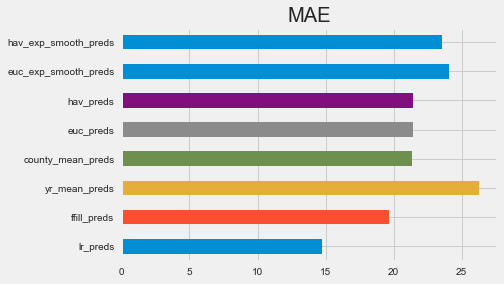

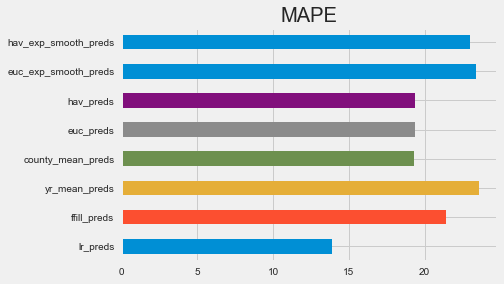

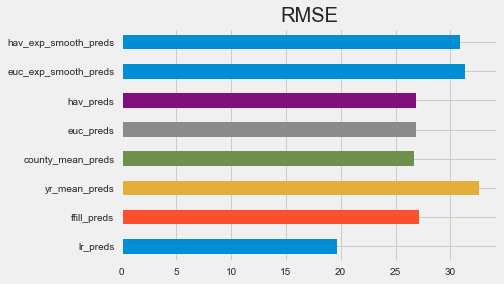

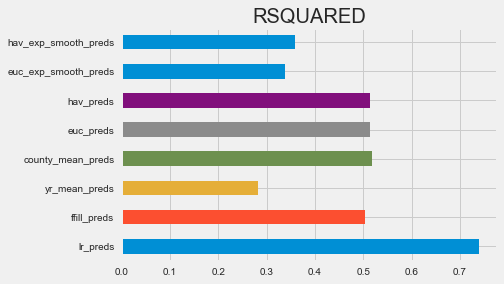

In [217]:
for col in metric_df.columns:
    metric_df[col].plot(kind="barh", title=col)#, rot=45)
    plt.show();

# Prediction Accuracy Metrics

In [180]:
mean_absolute_error(true, y_pred), mape(true, y_pred)

(14.764087244768886, 13.870040335955681)

# Save dataframe of results

In [80]:
predictions = pd.DataFrame({"true": true, "pred":y_pred, "years":pop_list}, index=full_data.index)
predictions.head()

,pred,true,years
fips_code,,,
01049,45.754643,61.2,1972
01077,35.202907,42.0,1971
01079,122.763256,73.0,2007
01083,123.767199,100.0,2007
01089,99.199669,93.0,1996


In [83]:
# predictions.to_csv("corn_predicitions.csv")

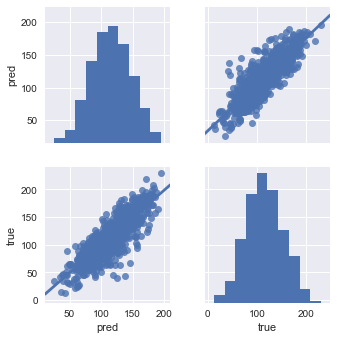

In [81]:
sns.pairplot(predictions[['pred','true']], kind='reg');

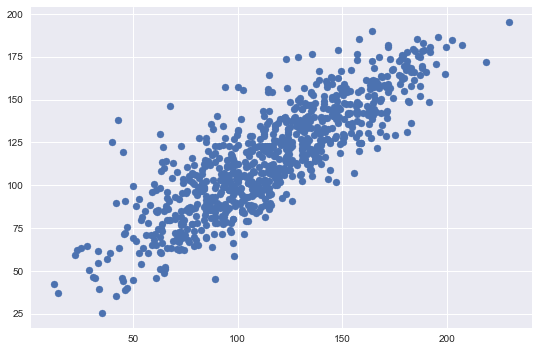

In [82]:
plt.scatter(true, y_pred);

In [91]:
yr_mean_df.interpolate(axis=1)

,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
fips_code,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
01049,35.0,56.0,61.2,61.70,56.00,63.0,75.00,29.00,42.1,80.3,17.6,38.7,63.9,54.7,88.4,96.2,49.3,79.8,41.8,90.0,60.6,85.6,123.7,53.80,109.90,65.0,92.0,86.0,74.0,101.0,80.0,117.00,84.0,100.0,136.0,129.0,58.0,80.0,71.0,117.0,87.0,95.25,103.50,140.50,144.30,151.00,96.8
01077,25.0,42.0,51.4,55.50,40.00,50.0,50.00,36.00,66.4,51.6,40.3,76.7,79.4,52.0,70.0,84.9,70.0,77.9,34.5,79.3,35.9,54.5,104.0,54.70,96.20,95.0,80.0,76.0,61.0,100.0,95.0,128.00,99.0,145.0,135.0,112.0,84.0,92.0,99.0,130.0,126.5,124.80,75.70,130.05,184.40,161.60,106.5
01079,30.0,45.0,52.5,43.25,34.00,42.0,53.00,33.00,30.3,42.6,20.0,69.7,69.6,41.1,67.9,74.5,75.0,65.7,31.1,83.3,44.3,78.6,109.2,65.60,110.90,92.0,82.0,108.0,68.0,136.0,99.0,138.00,115.0,153.0,151.0,136.0,77.0,73.0,98.0,112.0,143.0,132.50,78.60,172.00,187.10,140.30,117.2
01083,33.0,44.0,47.3,49.00,40.00,44.0,68.00,38.00,71.7,71.9,47.3,67.5,75.8,61.0,71.7,101.6,69.3,58.2,30.3,82.2,41.2,70.2,119.1,66.70,93.90,94.0,90.0,86.0,71.0,112.0,86.0,146.00,107.0,150.0,150.0,139.0,85.0,100.0,122.0,142.0,144.5,128.30,71.90,159.30,181.70,170.80,170.8
01089,33.0,51.0,56.7,61.10,54.00,75.0,79.00,35.00,61.3,74.9,25.2,55.4,96.0,55.9,78.5,98.1,63.3,71.2,45.9,80.0,49.3,82.0,98.9,50.00,116.70,104.0,93.5,83.0,68.0,121.0,88.0,118.00,102.0,125.0,137.0,143.0,90.0,100.0,153.0,128.0,113.9,147.90,110.60,161.60,169.00,173.20,150.7
05021,51.0,60.0,58.4,47.60,68.00,75.0,82.50,75.80,84.0,70.0,75.5,81.0,114.0,93.0,115.0,135.0,120.0,135.0,125.0,134.0,115.0,111.3,154.2,115.20,144.30,136.0,141.7,133.4,111.4,130.0,130.0,148.00,145.0,156.0,164.0,149.0,173.0,176.0,165.0,163.0,156.0,144.50,182.70,191.90,194.60,180.80,172.9
05031,47.0,42.0,41.4,42.60,40.60,51.4,62.40,58.00,64.0,65.0,24.0,81.0,86.0,72.0,100.0,140.0,88.0,130.0,130.0,129.0,88.0,114.7,140.4,70.20,132.10,126.0,132.0,129.1,86.0,102.0,130.0,130.00,123.0,154.0,160.0,136.0,145.0,184.0,170.0,168.0,169.6,147.30,191.10,189.30,183.80,179.90,179.9
05055,42.0,38.0,36.0,41.00,47.10,62.5,65.10,63.00,70.0,73.0,24.0,74.0,80.0,70.0,92.0,120.0,105.0,115.0,110.0,122.0,87.0,120.0,125.0,73.30,127.00,124.0,126.4,107.7,110.4,124.0,125.0,140.00,125.0,139.0,147.0,124.0,145.0,172.0,153.0,149.0,159.0,110.30,144.60,176.00,182.50,175.20,175.2
05067,47.0,44.0,41.7,37.10,32.50,55.1,76.00,66.00,88.0,64.0,24.0,63.0,104.0,92.0,105.0,110.0,105.0,115.0,105.0,119.0,92.0,103.4,159.4,96.60,129.80,119.0,120.0,109.1,110.4,158.0,140.0,157.00,147.0,140.0,151.0,130.0,156.0,149.0,150.0,153.0,150.0,147.40,166.90,174.70,173.00,168.90,147.3


# Python Time Series

In [64]:
X = full_data.columns.tolist()
X.remove(pop_list[i])

(814, 47)

In [65]:
y_pred = []
for i in range(full_data.shape[0]):
    X = full_data.columns.tolist()
    X.remove(pop_list[i])
    X_miss = np.array(X).reshape(-1,1)
    y = full_test.ix[i].dropna().values
    lm = LinearRegression()
    lm.fit(X_miss, y)
    
    X_full = np.array(full_data.columns).reshape(-1,1)
    preds = lm.predict(X_full)
    y_pred.append(preds[pop_list[i]-1970])

NameError: name 'pop_list' is not defined

In [4]:
import math
from statsmodels.tsa.stattools import acf, pacf
import statsmodels.tsa.stattools as ts
from statsmodels.tsa.arima_model import ARIMA

In [3]:
rng = pd.date_range('1/1/1970', periods=47, freq='Y')
y = pd.DataFrame({'yields':full_data.iloc[0].values},index=rng)
print("Time Series analysis for fips code: {}".format(full_data.iloc[0].name))
y.head(3)

Time Series analysis for fips code: 01049


,yields
1970-12-31,35.0
1971-12-31,56.0
1972-12-31,61.2


ARIMA (Autoregressive Integrated Moving Average) is a major tool used in time series analysis to attempt to forecast future values of a variable based on its present value.
- The purpose of ARIMA is to determine the nature of the relationship between our residuals, which would provide our model with a certain degree of forecasting power. In the first instance, in order to conduct a time series analysis we must express our dataset in terms of logarithms. If our data is expressed solely in price terms, then this does not allow for continuous compounding of returns over time and will give misleading results.
- An autoregressive process is when a time series follows a particular pattern in that its present value is in some way correlated to its past value(s). For instance, if we are able to use regression analysis to discern the present value of a variable from using its past value, then we refer to this as an AR(1) process:

Xt = ß0 + ß1X(t-1) + et

- However, there are some instances in which the present value of a variable can be determined from the past two or three values, which would incorporate an AR(2) or AR(3) process respectively:

Xt = ß0 + ß1X(t-1) + ß2X(t-2) + et
Xt = ß0 + ß1X(t-1) + ß2X(t-2) + ß3X(t-3) + et

- Note that in an ideal situation, ARIMAX would be employed which forecasts an ARIMA model by also taking explanatory variables into account. However, in situations where we wish to forecast a time series based on its past values alone, then ARIMA is a standard model for doing so.

In [5]:
lnprice=np.log(y)
lnprice

,yields
1970-12-31,3.555348
1971-12-31,4.025352
1972-12-31,4.114147
1973-12-31,4.122284
1974-12-31,4.025352
1975-12-31,4.143135
1976-12-31,4.317488
1977-12-31,3.367296
1978-12-31,3.740048
1979-12-31,4.385770


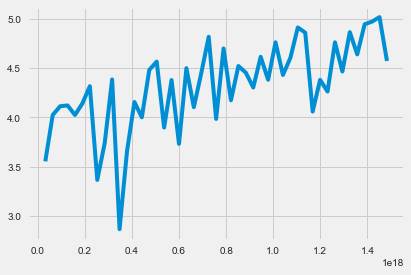

In [6]:
plt.plot(lnprice);

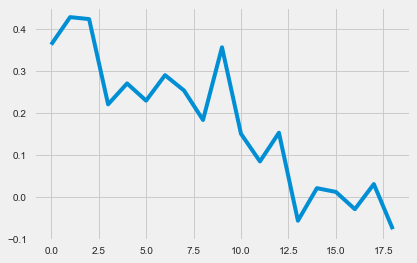

In [15]:
acf_1 =  acf(lnprice)[1:20]
plt.plot(acf_1);

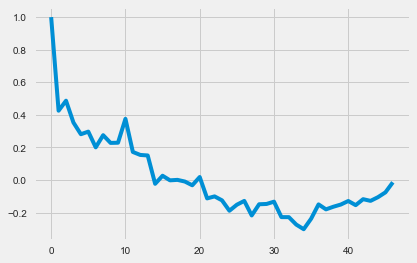

In [71]:
acf_1 = acf(y, nlags=y.shape[0])
plt.plot(acf_1);

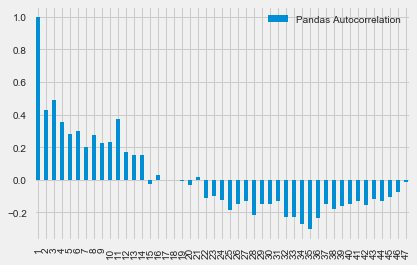

In [72]:
test_df = pd.DataFrame([acf_1]).T
test_df.columns = ['Pandas Autocorrelation']
test_df.index += 1
test_df.plot(kind='bar');

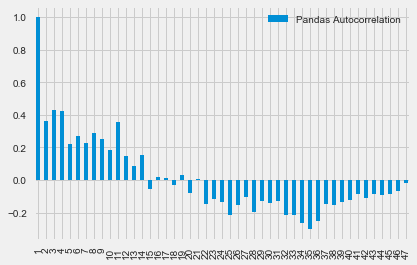

In [67]:
test_df = pd.DataFrame([acf_1]).T
test_df.columns = ['Pandas Autocorrelation']
test_df.index += 1
test_df.plot(kind='bar');

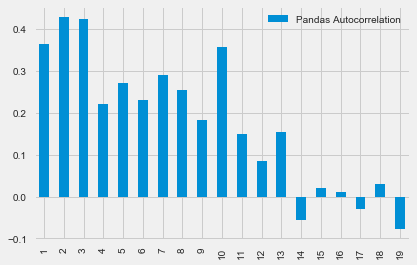

In [17]:
test_df = pd.DataFrame([acf_1]).T
test_df.columns = ['Pandas Autocorrelation']
test_df.index += 1
test_df.plot(kind='bar');

/Users/adamszabunio/anaconda/lib/python3.6/site-packages/statsmodels/regression/linear_model.py:1127: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


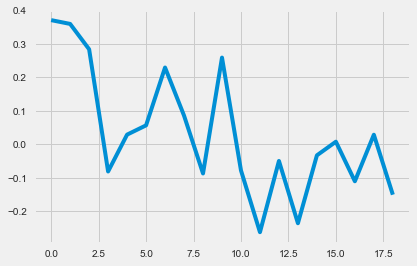

In [14]:
pacf_1 =  pacf(lnprice)[1:20]
plt.plot(pacf_1)

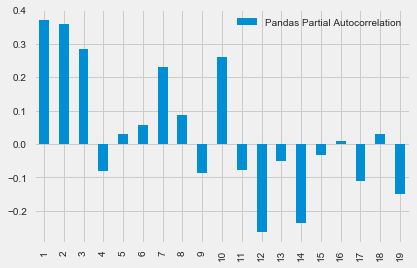

In [18]:
test_df = pd.DataFrame([pacf_1]).T
test_df.columns = ['Pandas Partial Autocorrelation']
test_df.index += 1
test_df.plot(kind='bar');

In [23]:
result = ts.adfuller(lnprice.yields.values, 1)
result

(-2.5003734815460348,
 0.11538347911056457,
 1,
 45,
 {'1%': -3.5848288532235939,
  '10%': -2.6023438271604937,
  '5%': -2.9282991495198907},
 45.171869493950155)

In [46]:
lnprice_diff=lnprice-lnprice.shift()
diff=lnprice_diff.dropna()
acf(diff)[1:20]

array([-0.56465222,  0.06392427,  0.16475946, -0.21199857,  0.07708141,
       -0.0640544 ,  0.00511939,  0.06395685, -0.16113407,  0.21519074,
       -0.08327068, -0.0803495 ,  0.22617132, -0.20253443,  0.06929443,
       -0.01260919, -0.05717351,  0.0996591 , -0.10966254])

/Users/adamszabunio/anaconda/lib/python3.6/site-packages/statsmodels/regression/linear_model.py:1127: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


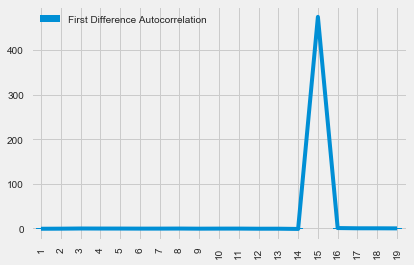

In [50]:
acf_1_diff =  acf(diff)[1:20]
test_df = pd.DataFrame([acf_1_diff]).T
test_df.columns = ['First Difference Autocorrelation']
test_df.index += 1
test_df.head()
test_df.plot(kind='bar')
pacf_1_diff = pacf(diff)[1:20]
plt.plot(pacf_1_diff);

In [61]:
price_matrix=lnprice.as_matrix()
model = ARIMA(price_matrix, order=(0,1,0))
model_fit = model.fit(disp=0)
model_fit.summary()

IndexError: list index out of range

In [63]:
predictions=model_fit.predict(122, 127, typ='levels')
predictions
predictionsadjusted=np.exp(predictions)
predictionsadjusted.shape

(81,)

In [86]:
y.T

,1970-12-31 00:00:00,1971-12-31 00:00:00,1972-12-31 00:00:00,1973-12-31 00:00:00,1974-12-31 00:00:00,1975-12-31 00:00:00,1976-12-31 00:00:00,1977-12-31 00:00:00,1978-12-31 00:00:00,1979-12-31 00:00:00,1980-12-31 00:00:00,1981-12-31 00:00:00,1982-12-31 00:00:00,1983-12-31 00:00:00,1984-12-31 00:00:00,1985-12-31 00:00:00,1986-12-31 00:00:00,1987-12-31 00:00:00,1988-12-31 00:00:00,1989-12-31 00:00:00,1990-12-31 00:00:00,1991-12-31 00:00:00,1992-12-31 00:00:00,1993-12-31 00:00:00,1994-12-31 00:00:00,1995-12-31 00:00:00,1996-12-31 00:00:00,1997-12-31 00:00:00,1998-12-31 00:00:00,1999-12-31 00:00:00,2000-12-31 00:00:00,2001-12-31 00:00:00,2002-12-31 00:00:00,2003-12-31 00:00:00,2004-12-31 00:00:00,2005-12-31 00:00:00,2006-12-31 00:00:00,2007-12-31 00:00:00,2008-12-31 00:00:00,2009-12-31 00:00:00,2010-12-31 00:00:00,2011-12-31 00:00:00,2012-12-31 00:00:00,2013-12-31 00:00:00,2014-12-31 00:00:00,2015-12-31 00:00:00,2016-12-31 00:00:00
yields,35.0,56.0,61.2,61.7,56.0,63.0,75.0,29.0,42.1,80.3,17.6,38.7,63.9,54.7,88.4,96.2,49.3,79.8,41.8,90.0,60.6,85.6,123.7,53.8,109.9,65.0,92.0,86.0,74.0,101.0,80.0,117.0,84.0,100.0,136.0,129.0,58.0,80.0,71.0,117.0,87.0,129.7,103.5,140.5,144.3,151.0,96.8


In [91]:
model = ARIMA(acf(diff), order=(0,1,0))
model_fit = model.fit(disp=0)
model_fit.summary()

IndexError: list index out of range

In [89]:
lnprice_diff=y-y.shift()
diff=lnprice_diff.dropna()
acf(diff)

array([ 1.        , -0.57892462,  0.18255324, -0.05736459, -0.075983  ,
        0.0993507 , -0.1335064 ,  0.05883026, -0.02045943, -0.10126387,
        0.26768655, -0.17257866,  0.00465077,  0.15608202, -0.16926695,
        0.06742531, -0.06141729,  0.03232178, -0.01642696, -0.02767526,
        0.13610878, -0.10082124,  0.0545902 , -0.0119119 , -0.06223389,
       -0.01877299,  0.13394812, -0.1585469 ,  0.06345911,  0.00205716,
        0.0886512 , -0.06654645,  0.01264805,  0.00795975, -0.05391939,
       -0.01938552,  0.04954753, -0.04163519,  0.00454848,  0.03864186,
        0.00187307])

In [90]:
len(acf(diff))

41

### Seasonal Time Series Analysis of One county 

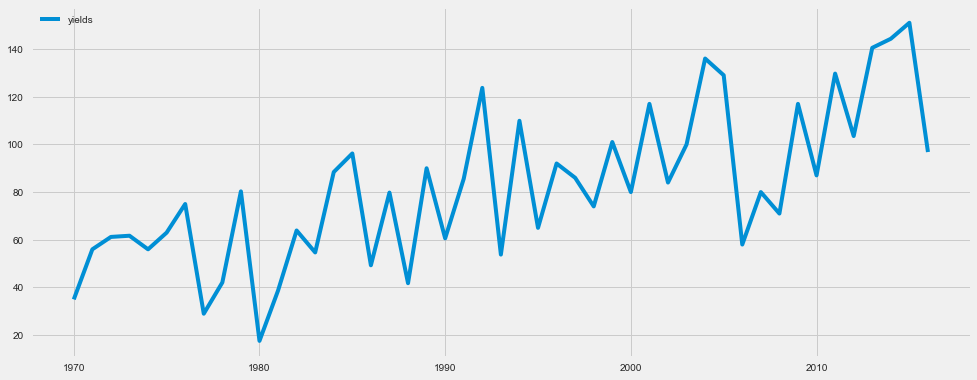

In [24]:
y.plot(figsize=(15, 6))
plt.show();

In [25]:
p = d = q = range(0, 2)
p, d, q

(range(0, 2), range(0, 2), range(0, 2))

In [26]:
pdq = list(itertools.product(p, d, q))

In [27]:
seasonal_pdq = [(x[0], x[1], x[2], 1) for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))


Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 1)
SARIMAX: (0, 0, 1) x (0, 1, 0, 1)
SARIMAX: (0, 1, 0) x (0, 1, 1, 1)
SARIMAX: (0, 1, 0) x (1, 0, 0, 1)


In [28]:
warnings.filterwarnings("ignore") # specify to ignore warning messages
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()
            print('ARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 1, 1) - AIC:503.25109305749487
ARIMA(0, 0, 0)x(0, 1, 1, 1) - AIC:415.5517868593641
ARIMA(0, 0, 0)x(1, 0, 0, 1) - AIC:456.9412210035913
ARIMA(0, 0, 0)x(1, 0, 1, 1) - AIC:418.8429065060254
ARIMA(0, 0, 0)x(1, 1, 0, 1) - AIC:429.24006528877857
ARIMA(0, 0, 0)x(1, 1, 1, 1) - AIC:416.42927935722145
ARIMA(0, 0, 1)x(0, 0, 0, 1) - AIC:503.25109305749487
ARIMA(0, 0, 1)x(0, 0, 1, 1) - AIC:487.21221470583873
ARIMA(0, 0, 1)x(0, 1, 0, 1) - AIC:415.5517868593641
ARIMA(0, 0, 1)x(0, 1, 1, 1) - AIC:408.8543056736197
ARIMA(0, 0, 1)x(1, 0, 0, 1) - AIC:418.8429040207647
ARIMA(0, 0, 1)x(1, 0, 1, 1) - AIC:411.98401515962564
ARIMA(0, 0, 1)x(1, 1, 0, 1) - AIC:416.429279343445
ARIMA(0, 0, 1)x(1, 1, 1, 1) - AIC:409.811272309149
ARIMA(0, 1, 0)x(0, 0, 1, 1) - AIC:415.5517868593641
ARIMA(0, 1, 0)x(0, 1, 1, 1) - AIC:433.9165865595815
ARIMA(0, 1, 0)x(1, 0, 0, 1) - AIC:429.24006528877857
ARIMA(0, 1, 0)x(1, 0, 1, 1) - AIC:416.42927935722145
ARIMA(0, 1, 0)x(1, 1, 0, 1) - AIC:454.5073291169694
ARIMA(

In [29]:
# ARIMA(0, 1, 1)x(0, 1, 1, 1)

mod = sm.tsa.statespace.SARIMAX(y,
                                order=(0, 1, 1),
                                seasonal_order=(0, 1, 1, 1),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()

print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -1.0000   1451.607     -0.001      0.999   -2846.098    2844.098
ma.S.L1       -1.0000   1457.734     -0.001      0.999   -2858.106    2856.106
sigma2       552.5942   1.61e+06      0.000      1.000   -3.15e+06    3.15e+06


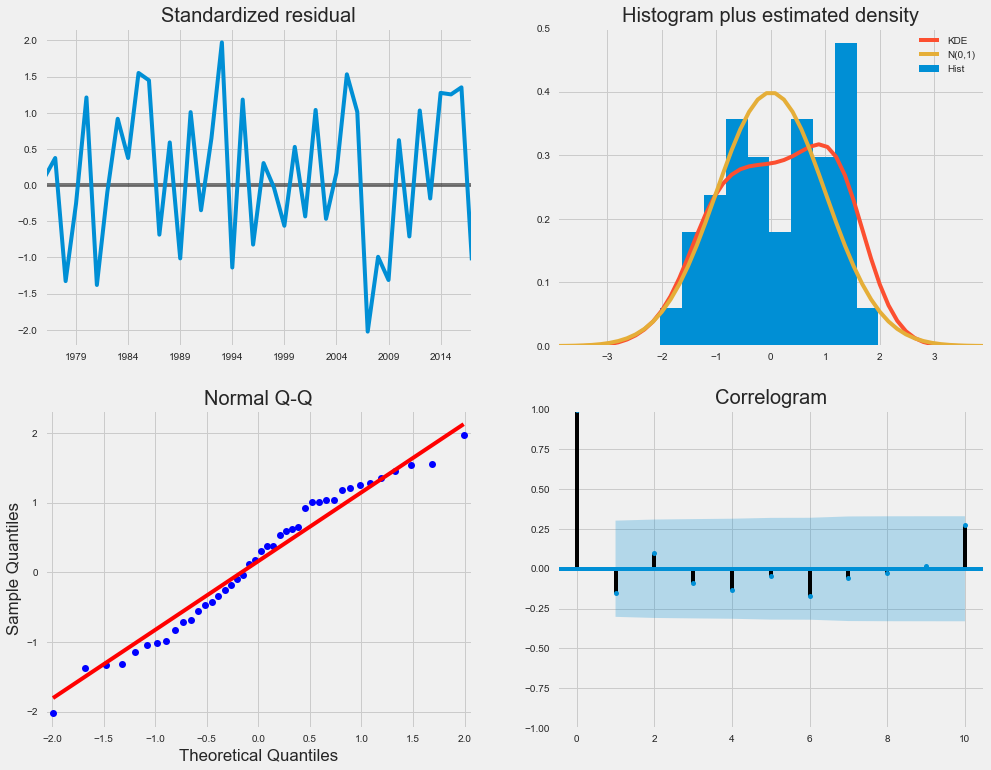

In [30]:
results.plot_diagnostics(figsize=(15, 12))
plt.show()

In [31]:
pred = results.get_prediction(start=pd.to_datetime('2000-12-31'), dynamic=False)
pred_ci = pred.conf_int()

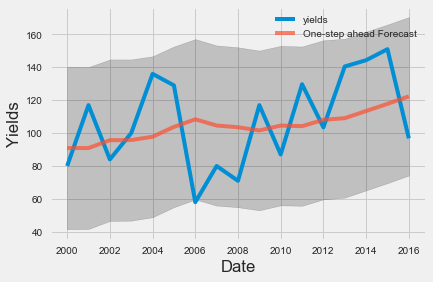

In [32]:
ax = y['2000':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7)

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('Date')
ax.set_ylabel('Yields')
plt.legend()

plt.show();

In [34]:
y_forecasted = pred.predicted_mean
y_truth = y['2000-12-31':]['yields']

print('The RMSE of our forecasts is {:.2f}'.format(np.sqrt(mean_squared_error(y_forecasted, y_truth))))

The RMSE of our forecasts is 26.75


In [35]:
pred_dynamic = results.get_prediction(start=pd.to_datetime('2000-12-31'), dynamic=True, full_results=True)
pred_dynamic_ci = pred_dynamic.conf_int()

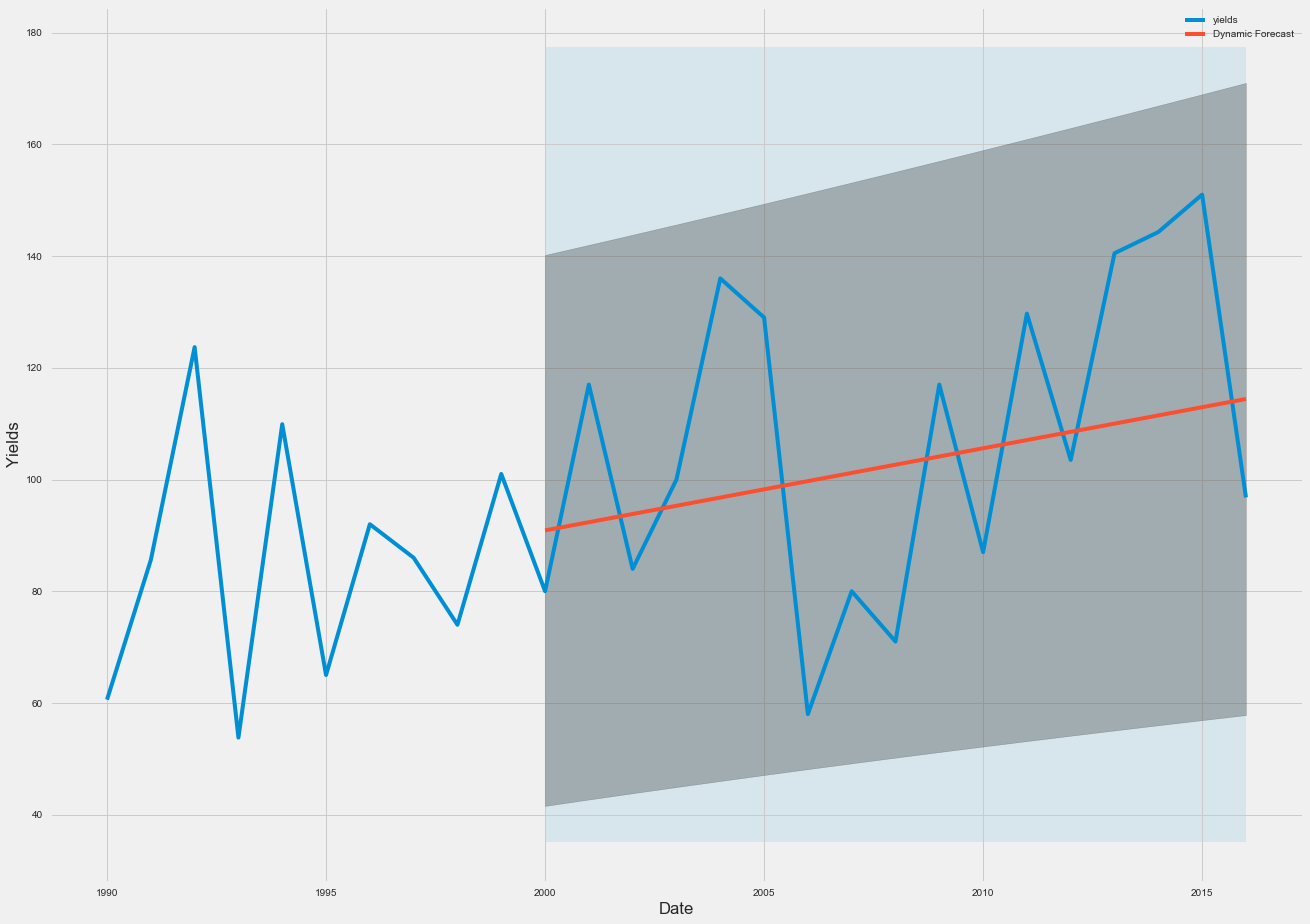

In [36]:
ax = y['1990':].plot(label='observed', figsize=(20, 15))
pred_dynamic.predicted_mean.plot(label='Dynamic Forecast', ax=ax)

ax.fill_between(pred_dynamic_ci.index,
                pred_dynamic_ci.iloc[:, 0],
                pred_dynamic_ci.iloc[:, 1], color='k', alpha=.25)

ax.fill_betweenx(ax.get_ylim(), pd.to_datetime('2000-12-31'), y.index[-1],
                 alpha=.1, zorder=-1)

ax.set_xlabel('Date')
ax.set_ylabel('Yields')

plt.legend()
plt.show()

In [37]:
# Extract the predicted and true values of our time series
y_forecasted = pred_dynamic.predicted_mean
y_truth = y['2000-12-31':]['yields']

print('The RMSE of our forecasts is {:.2f}'.format(np.sqrt(mean_squared_error(y_forecasted, y_truth))))

The RMSE of our forecasts is 25.82


In [38]:
# Get forecast 5 steps ahead in future
pred_uc = results.get_forecast(steps=5)

# Get confidence intervals of forecasts
pred_ci = pred_uc.conf_int()

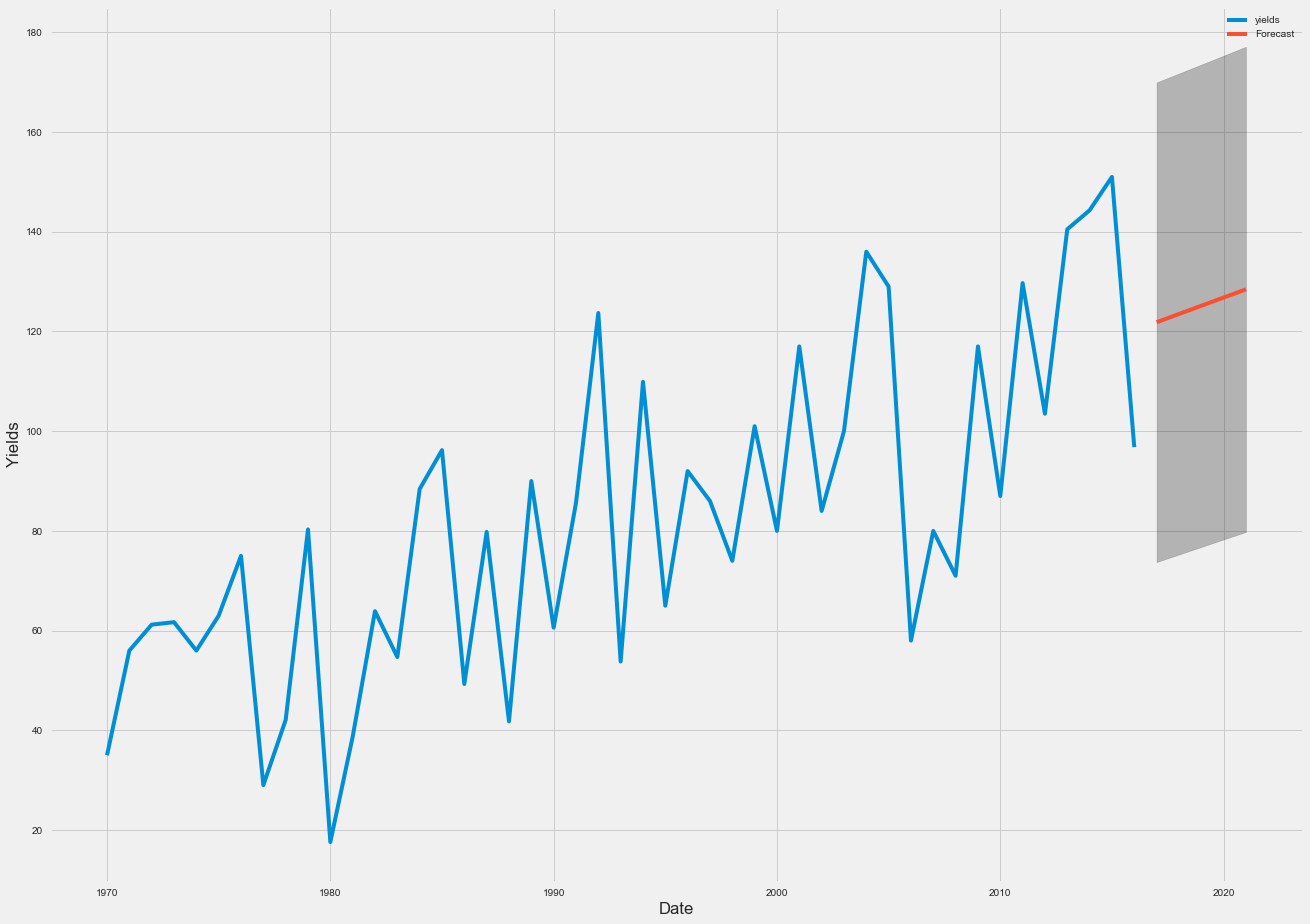

In [39]:
ax = y.plot(label='observed', figsize=(20, 15))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Yields')

plt.legend()
plt.show();

# Heatmap of all complete data

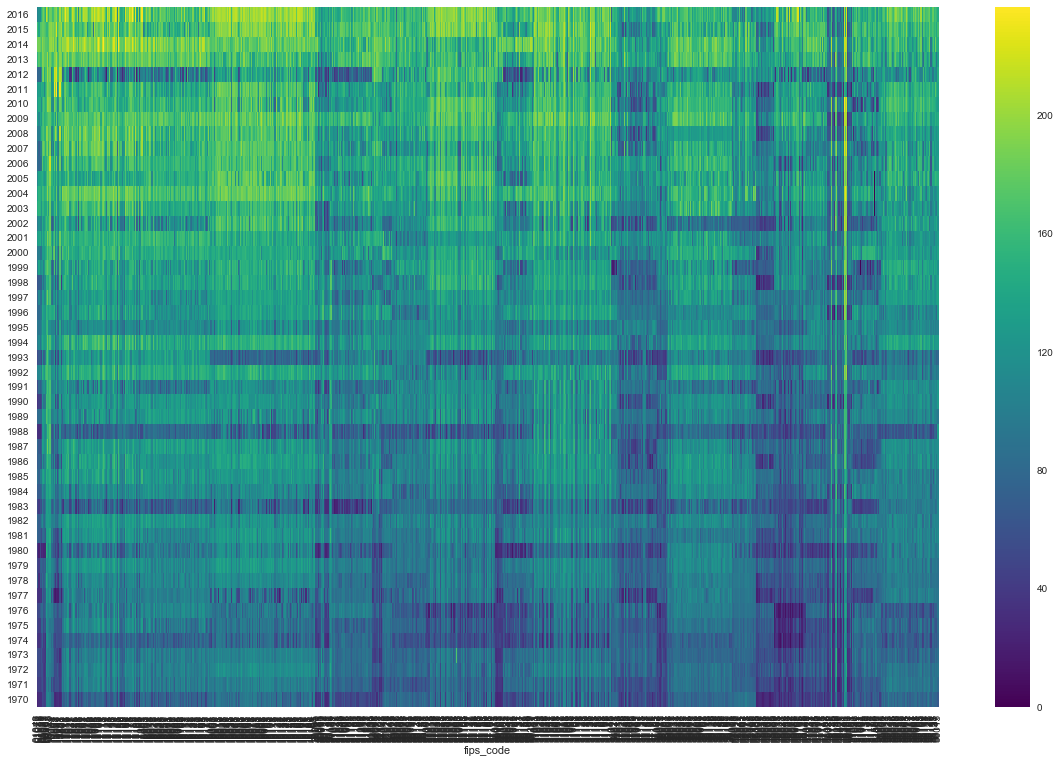

In [48]:
plt.style.use("seaborn")
fig, ax = plt.subplots(figsize=(18, 12))

sns.heatmap(full_data.T.reindex(index=full_data.T.index[::-1]),cmap="viridis");

# Time Series for Mean values of complete data

In [65]:
rng = pd.date_range('1/1/1970', periods=47, freq='Y')
y = pd.DataFrame({'yields':full_data.mean().values},index=rng)
print("Time Series analysis for mean value")
y.head(3)

Time Series analysis for mean value


,yields
1970-12-31,69.229730
1971-12-31,80.938821
1972-12-31,89.750491


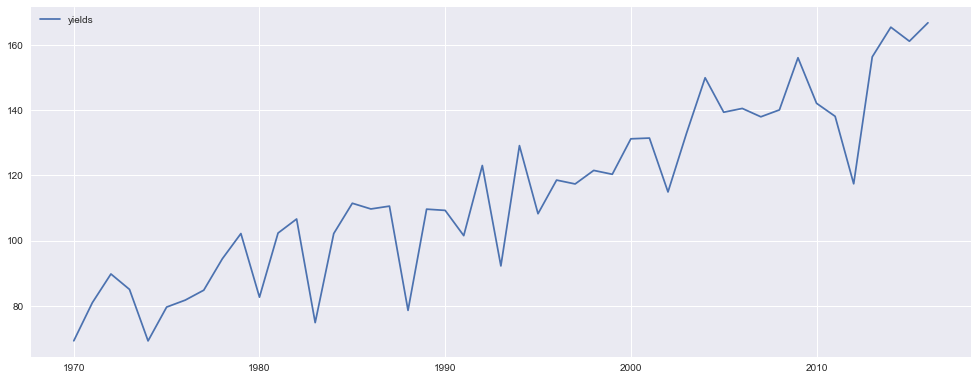

In [66]:
y.plot(figsize=(15, 6))
plt.show();

In [67]:
warnings.filterwarnings("ignore") # specify to ignore warning messages
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()
            print('ARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 1, 1) - AIC:510.01197309352796
ARIMA(0, 0, 0)x(0, 1, 1, 1) - AIC:359.22290305084533
ARIMA(0, 0, 0)x(1, 0, 0, 1) - AIC:392.1012973770224
ARIMA(0, 0, 0)x(1, 0, 1, 1) - AIC:352.80697581224905
ARIMA(0, 0, 0)x(1, 1, 0, 1) - AIC:372.73704523649803
ARIMA(0, 0, 0)x(1, 1, 1, 1) - AIC:360.6914684345279
ARIMA(0, 0, 1)x(0, 0, 0, 1) - AIC:510.01197309352796
ARIMA(0, 0, 1)x(0, 0, 1, 1) - AIC:481.4579086410057
ARIMA(0, 0, 1)x(0, 1, 0, 1) - AIC:359.22290305084533
ARIMA(0, 0, 1)x(0, 1, 1, 1) - AIC:353.8031688530033
ARIMA(0, 0, 1)x(1, 0, 0, 1) - AIC:352.8069859525291
ARIMA(0, 0, 1)x(1, 0, 1, 1) - AIC:346.97762865940905
ARIMA(0, 0, 1)x(1, 1, 0, 1) - AIC:360.6914685061876
ARIMA(0, 0, 1)x(1, 1, 1, 1) - AIC:355.68956120993647
ARIMA(0, 1, 0)x(0, 0, 1, 1) - AIC:359.22290305084533
ARIMA(0, 1, 0)x(0, 1, 1, 1) - AIC:371.3112662609715
ARIMA(0, 1, 0)x(1, 0, 0, 1) - AIC:372.73704523649803
ARIMA(0, 1, 0)x(1, 0, 1, 1) - AIC:360.6914684345279
ARIMA(0, 1, 0)x(1, 1, 0, 1) - AIC:399.42438517642887
A

In [68]:
# ARIMA(0, 1, 1)x(0, 1, 1, 1)

mod = sm.tsa.statespace.SARIMAX(y,
                                order=(0, 1, 1),
                                seasonal_order=(0, 1, 1, 1),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()

print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -1.0000   1166.720     -0.001      0.999   -2287.730    2285.730
ma.S.L1       -1.0000   1167.085     -0.001      0.999   -2288.444    2286.444
sigma2       127.1818   2.97e+05      0.000      1.000   -5.82e+05    5.82e+05


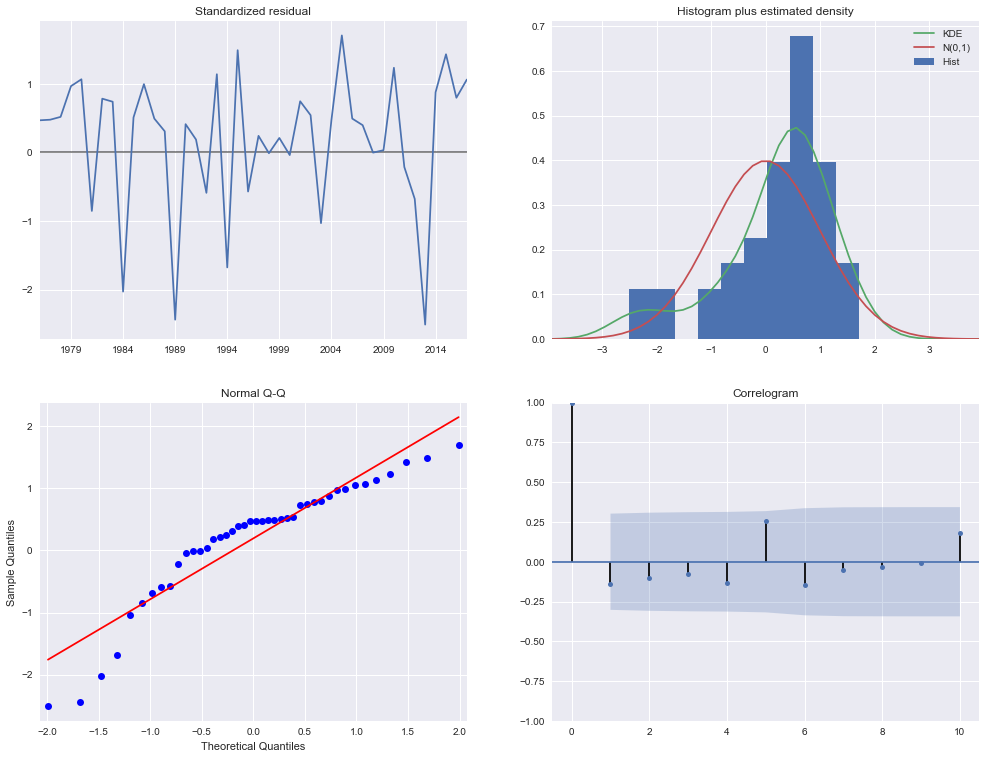

In [69]:
results.plot_diagnostics(figsize=(15, 12))
plt.show();

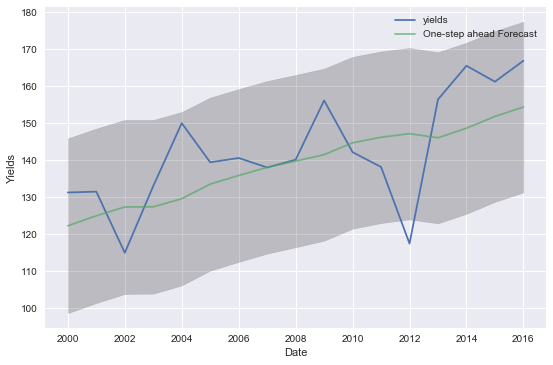

In [70]:
pred = results.get_prediction(start=pd.to_datetime('2000-12-31'), dynamic=False)
pred_ci = pred.conf_int()

ax = y['2000':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7)

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('Date')
ax.set_ylabel('Yields')
plt.legend()

plt.show();

In [71]:
y_forecasted = pred.predicted_mean
y_truth = y['2000-12-31':]['yields']

print('The RMSE of our forecasts is {:.2f}'.format(np.sqrt(mean_squared_error(y_forecasted, y_truth))))

The RMSE of our forecasts is 12.34


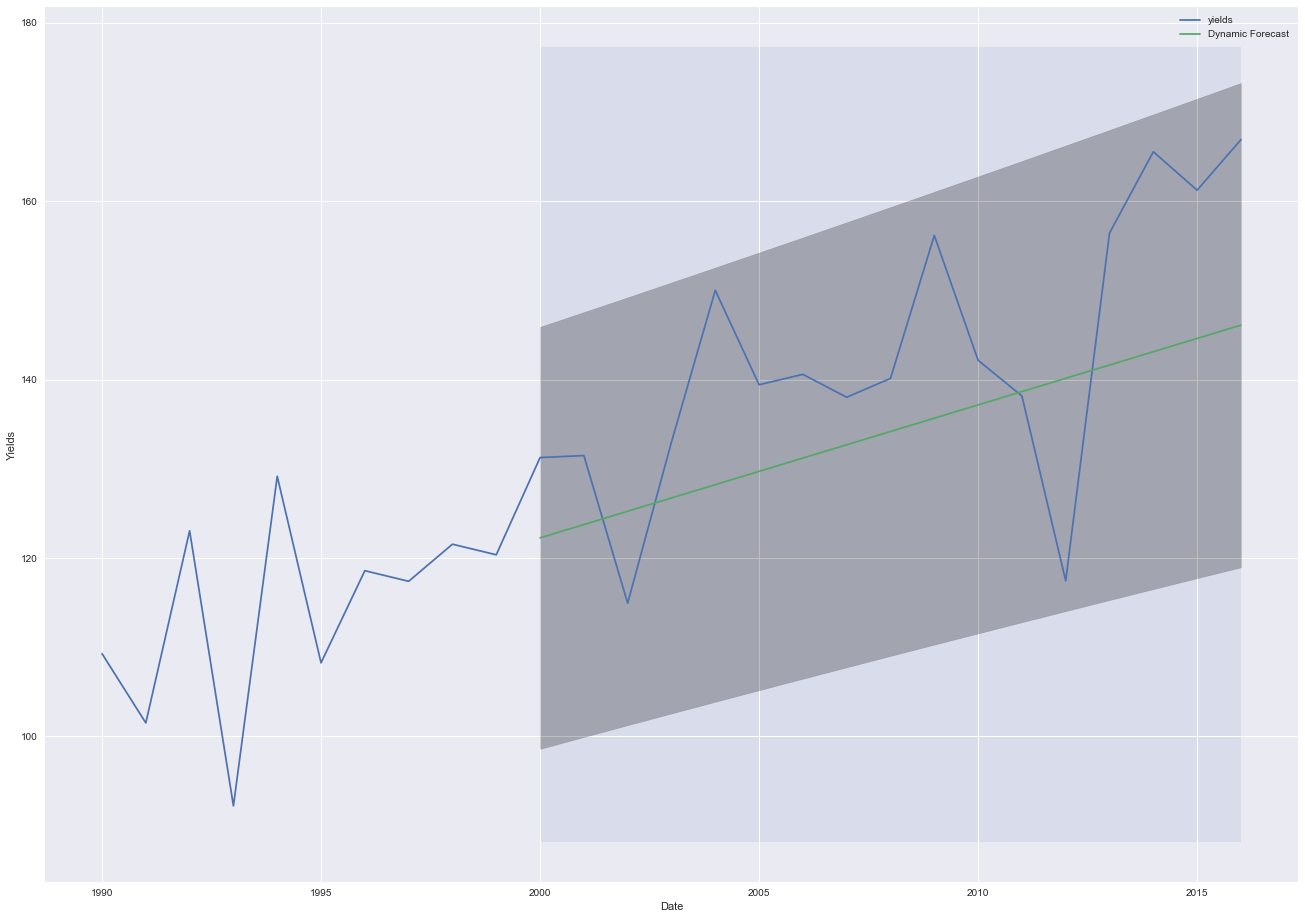

In [72]:
pred_dynamic = results.get_prediction(start=pd.to_datetime('2000-12-31'), dynamic=True, full_results=True)
pred_dynamic_ci = pred_dynamic.conf_int()

ax = y['1990':].plot(label='observed', figsize=(20, 15))
pred_dynamic.predicted_mean.plot(label='Dynamic Forecast', ax=ax)

ax.fill_between(pred_dynamic_ci.index,
                pred_dynamic_ci.iloc[:, 0],
                pred_dynamic_ci.iloc[:, 1], color='k', alpha=.25)

ax.fill_betweenx(ax.get_ylim(), pd.to_datetime('2000-12-31'), y.index[-1],
                 alpha=.1, zorder=-1)

ax.set_xlabel('Date')
ax.set_ylabel('Yields')

plt.legend()
plt.show();

In [73]:
# Extract the predicted and true values of our time series
y_forecasted = pred_dynamic.predicted_mean
y_truth = y['2000-12-31':]['yields']

print('The RMSE of our forecasts is {:.2f}'.format(np.sqrt(mean_squared_error(y_forecasted, y_truth))))

The RMSE of our forecasts is 14.13


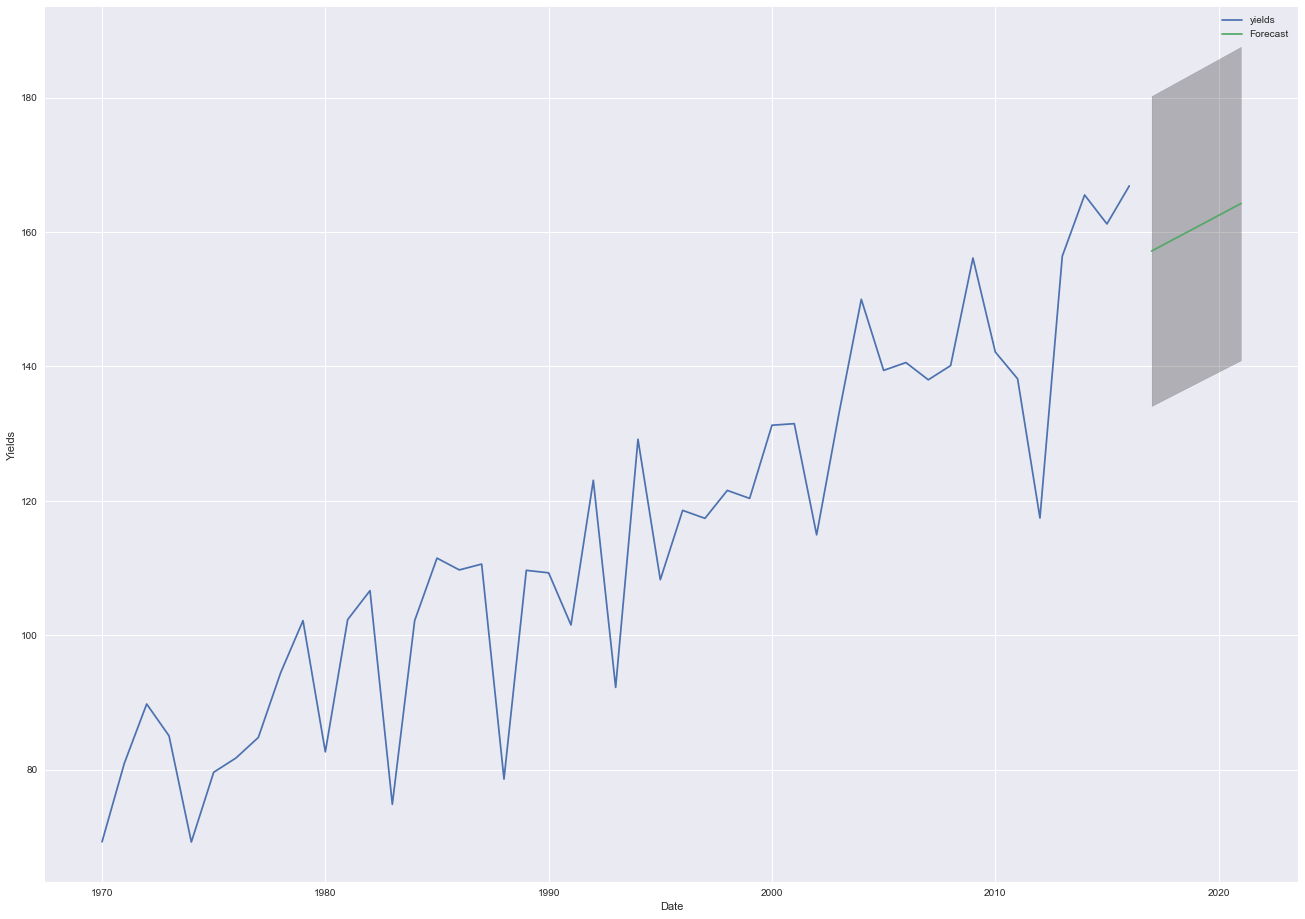

In [74]:
# Get forecast 5 steps ahead in future
pred_uc = results.get_forecast(steps=5)

# Get confidence intervals of forecasts
pred_ci = pred_uc.conf_int()

ax = y.plot(label='observed', figsize=(20, 15))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Yields')

plt.legend()
plt.show();

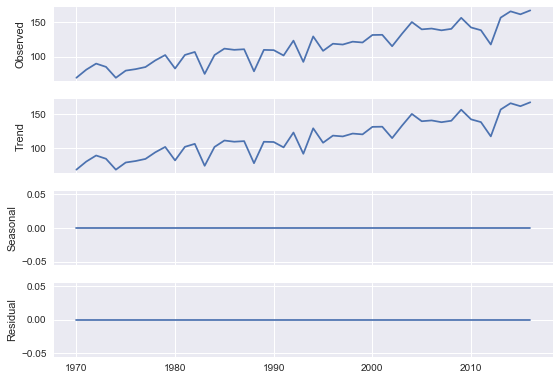

In [85]:
decomposition = sm.tsa.seasonal_decompose(y, model='additive')
fig = decomposition.plot()
plt.show();

___